# Аналитика в Яндекс.Афише

## Описание проекта

Вас пригласили на стажировку в отдел аналитики Яндекс.Афиши. Первое задание: помочь маркетологам оптимизировать маркетинговые затраты.




Необходимо изучить:

- как люди пользуются продуктом,

- когда они начинают покупать,

- сколько денег приносит каждый клиент

- когда клиент окупается.



В распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:

- лог сервера с данными о посещениях сайта Яндекс.Афиши,

- выгрузка всех заказов за этот период,

- статистика рекламных расходов.

## Шаг 1. Загрузите данные и подготовьте их к анализу

- Загрузите данные о визитах, заказах и расходах в переменные. 

- Оптимизируйте данные для анализа.

- Убедитесь, что тип данных в каждой колонке — правильный.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### *Данные о визитах:*

Таблица visits (лог сервера с информацией о посещениях сайта):
    
- Uid — уникальный идентификатор пользователя,
- Device — категория устройства пользователя,
- Start Ts — дата и время начала сессии,
- End Ts — дата и время окончания сессии,
- Source Id — идентификатор рекламного источника, из которого пришел пользователь.

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
visits.tail()

,Device,End Ts,Source Id,Start Ts,Uid
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485
359399,touch,2017-09-10 13:13:19,2,2017-09-10 13:13:00,18396128934054549559


In [6]:
visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

In [7]:
visits.duplicated().sum()

0

### *Данные о заказах:*

Таблица orders (информация о заказах):

- Uid — уникальный id пользователя, который сделал заказ,
- Buy Ts — дата и время заказа,
- Revenue — выручка Яндекс.Афиши с этого заказа.

In [8]:
orders = pd.read_csv('/datasets/orders_log.csv')

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [10]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [11]:
orders.tail()

,Buy Ts,Revenue,Uid
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247
50414,2018-06-01 00:02:00,3.42,83872787173869366


In [12]:
orders['Revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: Revenue, dtype: float64

In [13]:
orders[orders['Revenue'] == 0].count()

Buy Ts     51
Revenue    51
Uid        51
dtype: int64

In [14]:
orders[orders['Revenue'] == 0].head()

,Buy Ts,Revenue,Uid
1802,2017-06-22 18:19:00,0.0,17030528792926543083
2787,2017-07-07 15:54:00,0.0,10281425020415612933
4783,2017-08-02 14:54:00,0.0,184148767273119549
5095,2017-08-09 14:48:00,0.0,5603453646174104178
5863,2017-08-23 13:43:00,0.0,5603453646174104178


In [15]:
orders.duplicated().sum()

0

### *Данные о расходах:*

Таблица costs (информация о затратах на маркетинг):

- source_id — идентификатор рекламного источника,
- dt — дата,
- costs — затраты на этот рекламный источник в этот день.

In [16]:
costs = pd.read_csv('/datasets/costs.csv')

In [17]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [18]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [19]:
costs.tail()

,source_id,dt,costs
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15
2541,10,2018-05-31,17.60


In [20]:
costs['costs'].describe()

count    2542.000000
mean      129.477427
std       156.296628
min         0.540000
25%        21.945000
50%        77.295000
75%       170.065000
max      1788.280000
Name: costs, dtype: float64

In [21]:
costs.duplicated().sum()

0

### Вывод

- Необходимо переименовать и привести к нижнему регистру названия столбцов в таблицах visits и orders;


- Заменить тип динных в колонках End Ts и Start Ts таблицы visits, Buy Ts таблицы orders, dt таблицы costs на datetime; 


- В таблице с информацией о заказах есть данные, где  выручка Яндекс.Афиши с заказа равна нулю. 
    
    Причинами могут быть:
    проведение акций, применение скидок или оплата заказа подарочным сертификатом.
    
    Поскольку таких строк всего 51 (меньше 1% от объема данных), можно удалить их.
  

## Шаг 2. Предобработка данных

*Удалим строки в orders, где revenue равен нулю.*

In [22]:
orders = orders[orders['Revenue'] != 0]

In [23]:
orders[orders['Revenue'] == 0].count()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

*Переименуем столбцы.*

In [24]:
visits.columns = ['device', 'end_session', 'source_id', 'start_session', 'uid']
visits.head(1)

,device,end_session,source_id,start_session,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062


In [25]:
orders.columns = ['order_date', 'revenue', 'uid']
orders.head(1)

,order_date,revenue,uid
0,2017-06-01 00:10:00,17.0,10329302124590727494


In [26]:
costs.columns = ['source_id', 'date', 'costs']
costs.head(1)

,source_id,date,costs
0,1,2017-06-01,75.2


*Заменим тип данных.*

In [27]:
visits['end_session'] = pd.to_datetime(visits['end_session'])
visits['start_session'] = pd.to_datetime(visits['start_session'])
orders['order_date'] = pd.to_datetime(orders['order_date'])
costs['date'] = pd.to_datetime(costs['date'])

_Проверим, все ли пользователи пришли из одного источника. Или есть такие, которые заходили на сайт из разных источников._

In [28]:
visits.groupby('uid')['source_id'].nunique().sort_values()

uid
11863502262781          1
11731261366732678012    1
11731363928319253464    1
11731538822080018399    1
11731632440555246055    1
                       ..
14481163132396345939    7
8667719997796727944     7
5603453646174104178     7
17030528792926543083    7
1242922364974949363     7
Name: source_id, Length: 228169, dtype: int64

Похоже, что некоторые пользователи возвращались из разных источников.

Посмотрим, а все ли заказы соответствуют сессиям, то есть совершены после начала сессии и до ее окончания.

In [29]:
# Корректные заказы
correct_order  = orders.merge(visits, on='uid')
correct_order = correct_order.query('start_session <= order_date <= end_session')
correct_order.shape

(35886, 7)

In [30]:
orders.shape

(50364, 3)

In [31]:
# Пользователи, заказы которых не внутри сессии
orders.query('uid not in @correct_order.uid')

,order_date,revenue,uid
26,2017-06-01 14:20:00,1.47,4899721912549460321
46,2017-06-01 18:11:00,2.44,18346008462625591446
54,2017-06-01 19:39:00,0.18,13004013926921717095
78,2017-06-01 21:52:00,6.72,5228169263697525536
94,2017-06-01 23:00:00,2.20,11274979605518496333
...,...,...,...
50396,2018-05-31 23:01:00,1.16,4326846074047313748
50401,2018-05-31 23:14:00,0.30,5877288373018804921
50406,2018-05-31 23:40:00,1.16,13121453305610619664
50409,2018-05-31 23:43:00,3.67,1805512004303848280


Возьмем первого пользователя в строке, дата и время заказа которого 2017-06-01 14:20:00, и проверим его сессии.

In [32]:
visits.query('uid == "4899721912549460321"').sort_values('start_session')

,device,end_session,source_id,start_session,uid
304260,desktop,2017-06-01 12:16:00,3,2017-06-01 11:32:00,4899721912549460321
279486,desktop,2017-06-01 16:31:00,2,2017-06-01 15:26:00,4899721912549460321
237484,desktop,2017-06-13 11:42:00,2,2017-06-13 11:39:00,4899721912549460321


Для пользователя 4899721912549460321 такой сессии нет. Явный баг в данных. Но удалить эти данные мы не можем, потому что иначе потеряем ~ 20% данных.

Поскольку есть пользователи, пришедшие из разных источников, и точно неизвестно, какому источнику присвоить оформленный заказ пользователя, за каждым пользователем закрепим первый источник, из которого он пришел.

In [33]:
visits['first_source'] = visits.sort_values('start_session').groupby('uid')['source_id'].transform('first')
visits.head()

,device,end_session,source_id,start_session,uid,first_source
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,4
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,5
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,4
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,3


### Вывод

- Столбцы переименованы, тип данных заменен.

- Также, каждому пользователю присвоен один источник, из которого он пришел.

Теперь можно перейти к подсчету метрик.

## Шаг 3. Постройте отчёты и посчитайте метрики

__*Ответим на вопросы касательно продукта:*__

- Сколько людей пользуются в день, неделю, месяц?
- Сколько сессий в день?
- Сколько длится одна сессия?
- Как часто люди возвращаются?

#### 3.1. Сколько людей пользуются в день, неделю, месяц?

Рассчитаем DAU, WAU, MAU - количество уникальных пользователей в день, неделю и месяц.

Для этого сначала выделим из даты начала сессии год, месяц, день и полную дату, чтобы затем сгруппировать по необходимым столбцам и рассчитать наши показатели.

In [34]:
visits['session_year']  = visits['start_session'].dt.year
visits['session_month'] = visits['start_session'].dt.month
visits['session_week']  = visits['start_session'].dt.week
visits['session_date'] = visits['start_session'].dt.date

Посмотрим, как будут меняться показатели в зависимости от типа устройства.

In [35]:
visits_desktop = visits.query('device == "desktop"')
visits_touch = visits.query('device == "touch"')

__DAU:__

In [36]:
dau_desktop = int(visits_desktop.groupby('session_date').agg({'uid': 'nunique'}).mean())
dau_desktop

659

In [37]:
dau_touch = int(visits_touch.groupby('session_date').agg({'uid': 'nunique'}).mean())
dau_touch

252

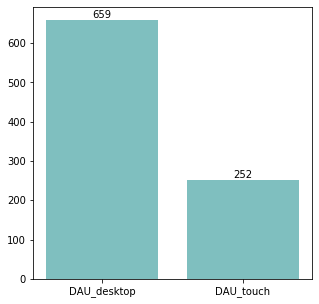

In [38]:
x = np.arange(2)

plt.figure(figsize=(5,5))
plt.bar(x, [dau_desktop, dau_touch], color = 'teal', alpha = 0.5)
plt.xticks(x, ['DAU_desktop','DAU_touch'])

for i, val in enumerate([dau_desktop, dau_touch]):
    plt.text(i, val, int(val), 
             horizontalalignment='center', 
             verticalalignment='bottom', 
             fontdict={'fontweight':500, 'size':10})

__WAU:__

In [39]:
wau_desktop = int(visits_desktop.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean())
wau_desktop

4129

In [40]:
wau_touch = int(visits_touch.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean())
wau_touch

1634

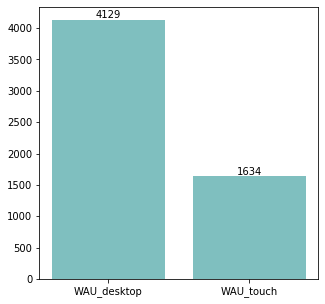

In [41]:
x = np.arange(2)

plt.figure(figsize=(5,5))
plt.bar(x, [wau_desktop, wau_touch], color = 'teal', alpha = 0.5)
plt.xticks(x, ['WAU_desktop','WAU_touch'])

for i, val in enumerate([wau_desktop, wau_touch]):
    plt.text(i, val, int(val), 
             horizontalalignment='center', 
             verticalalignment='bottom', 
             fontdict={'fontweight':500, 'size':10})

__MAU:__

In [42]:
mau_desktop = int(visits_desktop.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean())
mau_desktop

16724

In [43]:
mau_touch = int(visits_touch.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean())
mau_touch

6825

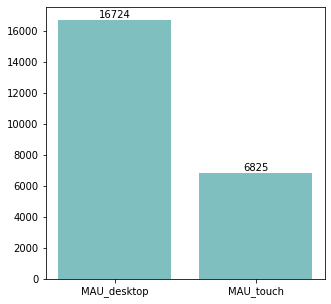

In [44]:
x = np.arange(2)

plt.figure(figsize=(5,5))
plt.bar(x, [mau_desktop, mau_touch], color = 'teal', alpha = 0.5)
plt.xticks(x, ['MAU_desktop','MAU_touch'])

for i, val in enumerate([mau_desktop, mau_touch]):
    plt.text(i, val, int(val), 
             horizontalalignment='center', 
             verticalalignment='bottom', 
             fontdict={'fontweight':500, 'size':10})

Рассчитаем отношение количества пользователей за день к количеству пользователей за месяц для каждого устройства.

In [45]:
sticky_dau_desktop = (dau_desktop / mau_desktop) * 100
sticky_dau_desktop

3.9404448696484096

In [46]:
sticky_dau_touch = (dau_touch / mau_touch) * 100
sticky_dau_touch

3.6923076923076925

#### Вывод

Отношение количества уникальных пользователей за день к количеству уникальных пользователей за месяц ~ 4%. 
Месячное количество уникальных пользователей превышает дневное в несколько раз. Для сервиса по продаже билетов на различные мероприятия это не так плохо - вряд ли обычный пользователь покупает билеты на концерты/в кино/театр и тп. каждый день. 

Однако на устройствах типа touch (смартфоны, планшеты) показатели пользовательской активности в несколько раз ниже показателей desktop-ов. Это может быть связано с тем, что мобильные версии сайта не всегда удобны для просмотра со смартфонов или планшетов. С персонального компьютера может быть значительно удобнее просмотреть мероприятия и приобрести билеты.

#### 3.2. Сколько сессий в день?

Посмотрим, сколько сессий приходится на одного пользователя в день.

Так же, как и при рассчете показателей пользовательской активности, будем смотреть на количество сессиий в день в разрезе устройств.

In [47]:
# Сгруппируем данные по дате сессии и посчитаем общее кол-во пользователей и кол-во уникальных пользователей
sessions_per_user_desktop = visits_desktop.groupby('session_date').agg({'uid': ['count','nunique']})

sessions_per_user_touch = visits_touch.groupby('session_date').agg({'uid': ['count','nunique']})

In [48]:
# Переименуем названия столбцов
sessions_per_user_desktop.columns = ['count_of_sessions', 'count_of_users']
sessions_per_user_touch.columns = ['count_of_sessions', 'count_of_users']

In [49]:
# Посчитаем, сколько сессий в день приходится на пользователя каждого устройства
sessions_per_user_desktop['count_of_session_per_user'] = sessions_per_user_desktop['count_of_sessions'] / sessions_per_user_desktop['count_of_users']

sessions_per_user_touch['count_of_session_per_user'] = sessions_per_user_touch['count_of_sessions'] / sessions_per_user_touch['count_of_users']

_Desktop:_

In [50]:
sessions_per_user_desktop.head()

,count_of_sessions,count_of_users,count_of_session_per_user
session_date,,,
2017-06-01,501,455,1.101099
2017-06-02,498,458,1.087336
2017-06-03,329,307,1.071661
2017-06-04,349,326,1.070552
2017-06-05,693,631,1.098257


In [51]:
sessions_per_user_desktop['count_of_session_per_user'].describe()

count    364.000000
mean       1.088955
std        0.022482
min        1.000000
25%        1.075870
50%        1.089000
75%        1.102551
max        1.209981
Name: count_of_session_per_user, dtype: float64

_Touch:_

In [52]:
sessions_per_user_touch.head()

,count_of_sessions,count_of_users,count_of_session_per_user
session_date,,,
2017-06-01,163,153,1.065359
2017-06-02,160,152,1.052632
2017-06-03,148,139,1.064748
2017-06-04,161,153,1.052288
2017-06-05,200,195,1.025641


In [53]:
sessions_per_user_touch['count_of_session_per_user'].describe()

count    363.000000
mean       1.051072
std        0.021471
min        1.000000
25%        1.037665
50%        1.049618
75%        1.061226
max        1.180233
Name: count_of_session_per_user, dtype: float64

#### Вывод

В среднем на каждого пользователя приходится по одной сессии в день. Для того, чтобы выбрать мероприятие и купить билеты, этого вполне достаточно. Но сколько длится сама сессия?

#### 3.3. Сколько длится одна сессия?

Рассчитаем среднюю продолжительность сессии для каждого устройсва.

In [54]:
visits_desktop['session_duration_sec'] = (visits_desktop['end_session'] - visits_desktop['start_session']).dt.seconds

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
visits_desktop['session_duration_sec'].describe()

count    262567.000000
mean        703.946977
std        1091.545596
min           0.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

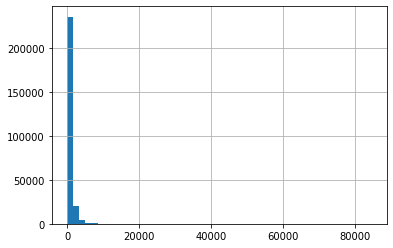

In [56]:
visits_desktop['session_duration_sec'].hist(bins=50)

Поскольку распределение не похоже на нормальное, будем искать не среднее значение, а моду.

In [57]:
visits_desktop['session_duration_sec'].mode()

0    60
dtype: int64

In [58]:
visits_touch['session_duration_sec'] = (visits_touch['end_session'] - visits_touch['start_session']).dt.seconds

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
visits_touch['session_duration_sec'].describe()

count    96833.000000
mean       479.619407
std        752.531533
min          0.000000
25%         60.000000
50%        180.000000
75%        600.000000
max      30840.000000
Name: session_duration_sec, dtype: float64

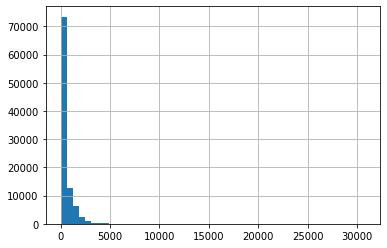

In [60]:
visits_touch['session_duration_sec'].hist(bins=50)

In [61]:
visits_touch['session_duration_sec'].mode()

0    60
dtype: int64

#### Вывод

Продолжительность сессии - 60 секунд. Когда пользователь точно знает, когда и на какое мероприятие он хочет пойти, одной минуты может и хватить, чтобы зайти на сайт и купить билет. 

Если посмотреть на среднее и медиану, то продолжительность сессии со смартфонов короче, чем на PC - в среднем от 3 до 8 минут на смартфонах, на PC от 6 до 11 минут. Как было указано выше, это может быть связано с тем, как отображается мобильная версия сайта. В любом случае, стоит проверить, почему так происходит.

#### 3.4. Как часто люди возвращаются?

Чтобы определить, как часто пользователи возвращаются, определим, когда они впервые проявили активность - посетили сайт.

In [62]:
visits['session_date'] = visits['session_date'].astype('datetime64')

In [63]:
# Сгруппируем данные по пользователю и найдем дату первого посещения
first_activity_date = visits.groupby(['uid'])['session_date'].min()

# Переименуем название столбца
first_activity_date.name = 'first_activity_date'

In [64]:
# Объединим получившийся Series с нашим датасетом
visits = visits.join(first_activity_date, on = 'uid')

Поскольку обычный пользователь в среднем заходит на сайт раз в месяц, то и когорты сформируем периодом в месяц.

In [65]:
# Добавим в датасет месяц первого посещения сайта
visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')

# И месяц посещения(повторного)
visits['activity_month'] = visits['session_date'].astype('datetime64[M]')

visits.head(1)

,device,end_session,source_id,start_session,uid,first_source,session_year,session_month,session_week,session_date,first_activity_date,first_activity_month,activity_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,4,2017,12,51,2017-12-20,2017-12-20,2017-12-01,2017-12-01


Чтобы оценить, какой процент пользователей возвращается в зависимости от времени, прошедшего с момента первого посещения сайта, рассчитаем lifetime каждой когорты.

In [66]:
visits['cohort_lifetime'] = visits['activity_month'] - visits['first_activity_month']

# Преобразуем 'cohort_lifetime' в число месяцев, прошедших между датами
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')

# Округлим значения столбца и приведём их к целочисленному типу
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

visits.head()

,device,end_session,source_id,start_session,uid,first_source,session_year,session_month,session_week,session_date,first_activity_date,first_activity_month,activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,4,2017,12,51,2017-12-20,2017-12-20,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2,2018,2,8,2018-02-19,2018-02-19,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,5,2017,7,26,2017-07-01,2017-07-01,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,4,2018,5,20,2018-05-20,2018-03-09,2018-03-01,2018-05-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,3,2017,12,52,2017-12-27,2017-12-27,2017-12-01,2017-12-01,0


In [67]:
# Чтобы лучше читались данные, оставим в месяце первого посещения только месяц и год
visits['first_activity_month'] = visits['first_activity_month'].dt.strftime('%Y-%m')

In [68]:
visits_pivot = visits.pivot_table(index='first_activity_month',
                                  columns='cohort_lifetime',
                                  values='uid',
                                  aggfunc='nunique')
visits_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,NaN
2017-08,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,NaN,NaN
2017-09,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,NaN,NaN,NaN
2017-10,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,NaN,NaN,NaN,NaN
2017-11,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,NaN,NaN,NaN,NaN,NaN
2017-12,25268.0,1410.0,960.0,786.0,512.0,481.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,22624.0,1351.0,890.0,565.0,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,22197.0,1267.0,565.0,446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


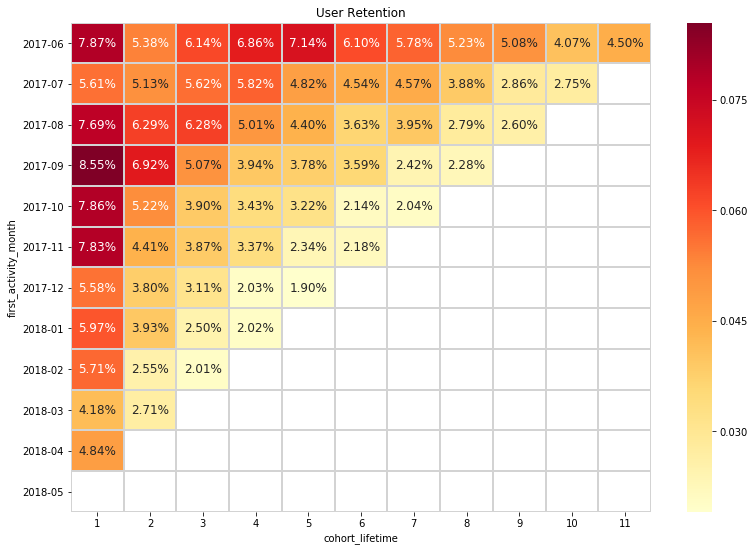

In [69]:
plt.figure(figsize=(13, 9))
plt.title('User Retention')
sns.heatmap(visits_pivot.div(visits_pivot[0], axis=0).drop(columns=[0]), annot=True, fmt='.2%',
            annot_kws={'size':12}, linewidths=1, linecolor='lightgrey', cmap='YlOrRd')

Для каждой когорты характерно постепенное падение посещаемости сервиса от месяца к месяцу. 

Отдельно выделяется когорта июня 2017 года, когда retention сначала падает, а затем с третьего месяца по пятый начинает быстро расти, затем снова снижается. 

Если примерно прикинуть, какой это период года, то рост посещаемости выпадает на октябрь-ноябрь - период подготовки к новогодним праздникам, когда люди могут активно искать информацию о различных предпраздничных/праздничных мероприятиях, покупать билеты на них.

А возможно, были подключены новые источники, из которых стали активно приходить пользователи. Поэтому, построим временные ряды и посмотрим, из каких источников приходило больше всего пользователей.

In [70]:
# Количество пользователей будем считать в процентном соотношении
user_source = (visits.groupby(['first_activity_month', 
                               'first_source'])['uid'].nunique() / visits.groupby('first_activity_month')['uid'].nunique()).reset_index()

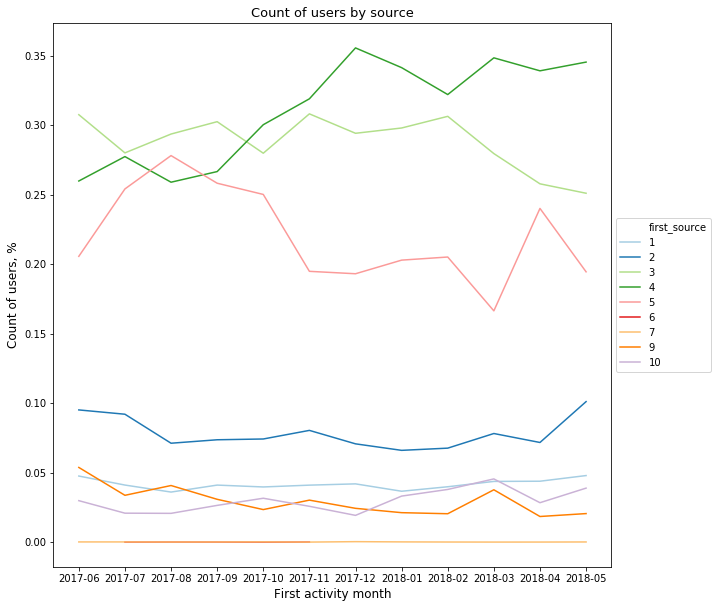

In [71]:
palette = sns.color_palette("Paired", 9)

plt.figure(figsize=(10,10))


sns.lineplot(data = user_source, x = 'first_activity_month', y = 'uid', hue = 'first_source', palette=palette)

plt.title('Count of users by source', fontsize=13)
plt.xlabel('First activity month', fontsize = 12)
plt.ylabel('Count of users, %', fontsize = 12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [72]:
user_source_hist = visits.groupby('first_source')['uid'].nunique().sort_values()
user_source_hist

first_source
6         2
7        32
9      6448
10     6903
1      9469
2     17616
5     49237
3     66116
4     72346
Name: uid, dtype: int64

Text(0, 0.5, 'Source id')

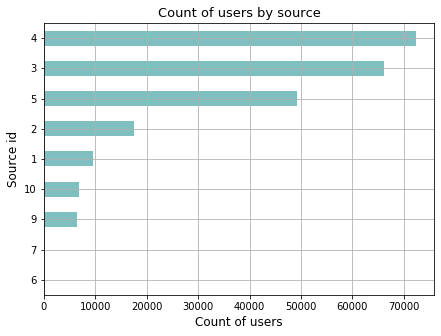

In [73]:
plt.figure(figsize=(7,5))
user_source_hist.plot(kind = 'barh', color = 'teal', alpha = 0.5, grid = True)

plt.title('Count of users by source', fontsize=13)
plt.xlabel('Count of users', fontsize = 12)
plt.ylabel('Source id', fontsize = 12)

Больше всего пользователей пришло из источника номер 4 - больше 70 000 человек. С сентября 2017 года число пользователей из этого источника начинает расти. Пик приходится на ноябрь-декабрь 2017 года. После чего количество посещений немного убывает.

Самые низкие показатели у источников 6 (2 пользователя за весь период) и 7 (32 пользователя). 

#### Вывод

Для каждой когорты характерно постепенное падение посещаемости сервиса от месяца к месяцу. 

Отдельно выделяется когорта июня 2017 года, когда retention сначала падает, а затем с третьего месяца по пятый начинает быстро расти, затем снова снижается. 

Скорее всего, эти пользователи пришли из источника номер 4, поскольку именно по нему в этот период наблюдается рост, когда как количество пользователей из других источников постепенно снижается.

__*Ответим на вопросы о продажах:*__

- Когда люди начинают покупать?
- Сколько раз покупают за период?
- Какой средний чек?
- Сколько денег приносят? (LTV)

#### 3.5. Когда люди начинают покупать?

Чтобы определить, когда посетители Яндекс.Афиши начинают покупать, для начала найдем дату первого заказа для каждого пользователя.

In [74]:
# Сохраним в новый датасет только те столбцы, которые нам понядобятся для анализа
visits_first = visits[['uid', 'first_activity_date']].copy()

In [75]:
# Сгруппируем данные по пользователю и найдем дату первой покупки
first_order_date = orders.groupby(['uid'])['order_date'].min()

# Переименуем название столбца
first_order_date.name = 'first_order_date'

In [76]:
# Объединим получившийся Series с нашим датасетом
orders =orders.join(first_order_date, on = 'uid')

In [77]:
# Выделим месяц первого заказа
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')

# И месяц заказа(повторного)
orders['order_month'] = orders['order_date'].astype('datetime64[M]')

In [78]:
# Объединим информацию о заказах и посещениях
user_purchases = orders.merge(visits_first, on ='uid', how = 'left')
user_purchases.head()

,order_date,revenue,uid,first_order_date,first_order_month,order_month,first_activity_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,2017-06-01


Теперь посчитаем, сколько дней прошло с момента первого посещения до первой покупки.

In [79]:
user_purchases['visit_purchase'] = (user_purchases['first_order_date'] - user_purchases['first_activity_date']).dt.days
user_purchases.head()

,order_date,revenue,uid,first_order_date,first_order_month,order_month,first_activity_date,visit_purchase
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,2017-06-01,0


In [80]:
user_purchases['visit_purchase'].describe()

count    759783.000000
mean         17.703169
std          42.601800
min           0.000000
25%           0.000000
50%           2.000000
75%           9.000000
max         363.000000
Name: visit_purchase, dtype: float64

Посмотрим на графике, как распределяются данные.

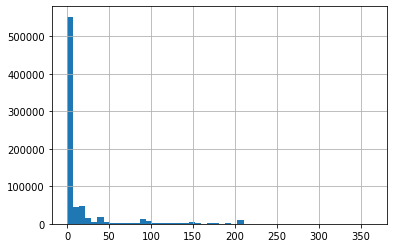

In [81]:
user_purchases['visit_purchase'].hist(bins = 50)

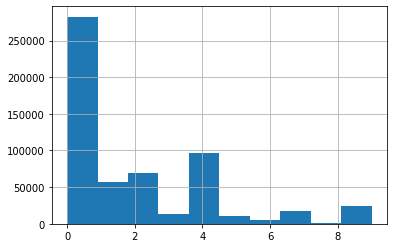

In [82]:
user_purchases[user_purchases['visit_purchase'] < 10]['visit_purchase'].hist()

In [83]:
user_purchases['visit_purchase'].mode()

0    0
dtype: int64

#### Вывод

Чаще всего пользователи совершают покупку в тот же день, когда они посещали сайт.

Для некоторых пользователей этот показатель может варьироваться от 1 до 2 дней, а для кого-то и 4-х дней может быть недостаточно, чтобы определиться с покупкой. 

Возможно, люди не сразу находят нужную информацию. Или же наоборот, ждут, когда откроются продажи билетов на тот или иной концерт, и посещают сайт каждый день, пока, наконец, не купят билет.

#### 3.6. Сколько раз покупают за период?

Посмотрим, как часто пользователи совершают покупки. Период обозначим длиною в месяц.

In [84]:
count_of_orders = orders.groupby(['order_month', 'uid']).agg({'order_date': 'count'})
count_of_orders.columns = ['count_of_orders']
count_of_orders

count_of_orders
order_month uid                                  
2017-06-01  1575281904278712                    2
            16233238570251706                   1
            29085576454138824                   1
            31782048561502182                   1
            50884319066603964                   1
...                                           ...
2018-05-01  18417227789295707563                1
            18418973552381796231                1
            18419772037216346332                1
            18428860277441438399                1
2018-06-01  83872787173869366                   1

[40999 rows x 1 columns]

In [85]:
count_of_orders['count_of_orders'].describe()

count    40999.000000
mean         1.228420
std          1.383647
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         67.000000
Name: count_of_orders, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e76fc4690>]],
      dtype=object)

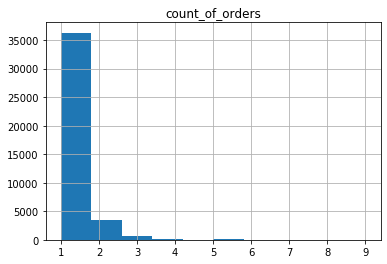

In [86]:
count_of_orders[count_of_orders['count_of_orders']<10].hist()

In [87]:
count_of_orders['count_of_orders'].mode()

0    1
dtype: int64

#### Вывод

Для большей части пользователей характерна одна покупка в месяц. Можно считать, что для сервиса по продаже билетов это не плохой показатель. Так как покупка билетов каждый день или даже каждую неделю это, скорее, исключение и встречается редко. 

#### 3.7. Какой средний чек?

Рассчитаем средний чек для каждой когорты и изучим, как он менеятся с течением времени.

In [88]:
# Сгруппируем данные по когорте и месяцу совершения заказа
orders_grouped_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue':'sum','uid':'nunique'})
orders_grouped_by_cohorts

revenue   uid
first_order_month order_month                
2017-06-01        2017-06-01    9557.49  2022
                  2017-07-01     981.82    61
                  2017-08-01     885.34    50
                  2017-09-01    1931.30    54
                  2017-10-01    2068.58    87
...                                 ...   ...
2018-03-01        2018-05-01    1114.87    58
2018-04-01        2018-04-01   10600.69  2274
                  2018-05-01    1209.92    69
2018-05-01        2018-05-01   13925.76  2986
2018-06-01        2018-06-01       3.42     1

[79 rows x 2 columns]

In [89]:
# Рассчитаем средний чек покупателя
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid']
orders_grouped_by_cohorts.head()

revenue   uid  revenue_per_user
first_order_month order_month                                 
2017-06-01        2017-06-01   9557.49  2022          4.726751
                  2017-07-01    981.82    61         16.095410
                  2017-08-01    885.34    50         17.706800
                  2017-09-01   1931.30    54         35.764815
                  2017-10-01   2068.58    87         23.776782

In [90]:
orders_grouped_by_cohorts.pivot_table(index='first_order_month',
                                      columns='order_month',
                                      values='revenue_per_user',
                                      aggfunc='mean')

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,4.726751,16.095410,17.706800,35.764815,23.776782,22.207761,31.496721,25.033191,19.295690,27.233556,25.681333,9.804151,NaN
2017-07-01,NaN,6.013345,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,NaN,NaN,5.280373,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN
2017-09-01,NaN,NaN,NaN,5.648907,22.360388,13.544646,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.159358,7.359005,6.786583,12.510660,7.539375,4.580833,7.564839,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.742434,7.816575,39.366019,48.135052,27.431400,23.518413,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.135636,8.721228,12.365542,11.199767,4.699556,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156987,8.610000,4.942414,6.941026,NaN


Рассчитаем lifetime каждой когорты.

In [91]:
orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['order_month'] - orders_grouped_by_cohorts['first_order_month']
orders_grouped_by_cohorts.head()

,first_order_month,order_month,revenue,uid,revenue_per_user,cohort_lifetime
0,2017-06-01,2017-06-01,9557.49,2022,4.726751,0 days
1,2017-06-01,2017-07-01,981.82,61,16.095410,30 days
2,2017-06-01,2017-08-01,885.34,50,17.706800,61 days
3,2017-06-01,2017-09-01,1931.30,54,35.764815,92 days
4,2017-06-01,2017-10-01,2068.58,87,23.776782,122 days


In [92]:
# Преобразуем 'cohort_lifetime' в число месяцев, прошедших между датами
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1,'M')

In [93]:
# Округлим значения столбца и приведём их к целочисленному типу
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')
orders_grouped_by_cohorts.head()

,first_order_month,order_month,revenue,uid,revenue_per_user,cohort_lifetime
0,2017-06-01,2017-06-01,9557.49,2022,4.726751,0
1,2017-06-01,2017-07-01,981.82,61,16.095410,1
2,2017-06-01,2017-08-01,885.34,50,17.706800,2
3,2017-06-01,2017-09-01,1931.30,54,35.764815,3
4,2017-06-01,2017-10-01,2068.58,87,23.776782,4


In [94]:
# Чтобы лучше читались данные, оставим в месяце первого посещения только месяц и год
orders_grouped_by_cohorts['first_order_month'] = orders_grouped_by_cohorts['first_order_month'].dt.strftime('%Y-%m')

In [95]:
revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(index='first_order_month',
                                                               columns='cohort_lifetime',
                                                               values='revenue_per_user',
                                                               aggfunc='mean')
revenue_per_user_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.726751,16.095410,17.706800,35.764815,23.776782,22.207761,31.496721,25.033191,19.295690,27.233556,25.681333,9.804151
2017-07,6.013345,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08,5.280373,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN,NaN
2017-09,5.648907,22.360388,13.544646,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN,NaN,NaN
2017-10,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN,NaN,NaN,NaN
2017-11,5.159358,7.359005,6.786583,12.510660,7.539375,4.580833,7.564839,NaN,NaN,NaN,NaN,NaN
2017-12,4.742434,7.816575,39.366019,48.135052,27.431400,23.518413,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.135636,8.721228,12.365542,11.199767,4.699556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.156987,8.610000,4.942414,6.941026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


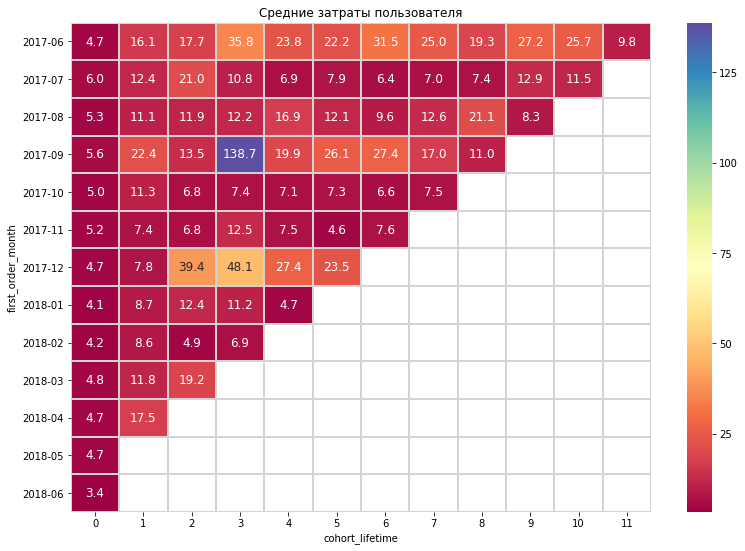

In [96]:
plt.figure(figsize=(13, 9))
plt.title('Средние затраты пользователя')
sns.heatmap(revenue_per_user_pivot, annot=True, fmt='.1f',
            annot_kws={'size':12}, linewidths=1, linecolor='lightgrey', cmap='Spectral')

#### Вывод

Если для когорты июня 2017 года характерен постепенный рост среднего чека (как и в случае с retention), то для когорты декабря 2017 года средний чек резко увеличивается на второй-третий месяц lifetime. 

Поскольку в тот период не наблюдается увеличение числа посетителей для этой когорты, можно предположить, что такой средний чек связан с несколькими дорогими заказами у некоторых пользователей.

То же самое можно сказать и о когорте сентября 2017 года, средний чек которой на третий месяц lifetime составил 138.7. 

#### 3.8. Сколько денег приносят? (LTV)

Чтобы понять, сколько денег приносит каждый пользователь, рассчитаем LTV.

Сначала без разбивки на источники, чтобы увидеть картину в целом.

Для удобства будем рассчитывать этот показатель по когортам.

In [97]:
# Присоединим к заказам первый источник, из которого пришел пользователь
orders_new = orders.merge(visits[['uid', 'first_source']].drop_duplicates(), on = 'uid')
orders_new.head(1)

,order_date,revenue,uid,first_order_date,first_order_month,order_month,first_source
0,2017-06-01 00:10:00,17.0,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,1


In [98]:
# Посчитаем количество новых покупателей за каждый месяц:
cohort_sizes = orders_new.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2022
1,2017-07-01,1922
2,2017-08-01,1369
3,2017-09-01,2579
4,2017-10-01,4340
5,2017-11-01,4078
6,2017-12-01,4380
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3534


In [99]:
# Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку
cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [100]:
# Добавим в таблицу, сколько людей первый раз совершили покупку в каждый месяц
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2022,2017-06-01,9557.49
1,2017-06-01,2022,2017-07-01,981.82
2,2017-06-01,2022,2017-08-01,885.34
3,2017-06-01,2022,2017-09-01,1931.30
4,2017-06-01,2022,2017-10-01,2068.58


LTV будем рассчитывать из валовой прибыли. 

Поскольку изначально маржинальность не была задана, установим ее на уровне 50%.

In [101]:
margin_rate = 1

In [102]:
report['gross_profit'] = report['revenue'] * margin_rate

# Дополнительно вычислим "возраст" когорты
report['age_cohort'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age_cohort'] = report['age_cohort'].round().astype('int')

report.head()

,first_order_month,n_buyers,order_month,revenue,gross_profit,age_cohort
0,2017-06-01,2022,2017-06-01,9557.49,9557.49,0
1,2017-06-01,2022,2017-07-01,981.82,981.82,1
2,2017-06-01,2022,2017-08-01,885.34,885.34,2
3,2017-06-01,2022,2017-09-01,1931.30,1931.30,3
4,2017-06-01,2022,2017-10-01,2068.58,2068.58,4


In [103]:
# Теперь рассчитаем ltv
report['ltv'] = report['gross_profit'] / report['n_buyers']

# Выведем сзачения через сводную таблицу
output = report.pivot_table(index='first_order_month', 
                            columns='age_cohort', 
                            values='ltv', 
                            aggfunc='mean').round(2)

# применим cumsum, чтобы видеть суммарную выручку с ростом “возраста” когорты 
output.cumsum(axis=1).fillna('')

age_cohort,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.73,5.22,5.66,6.62,7.64,8.38,9.33,9.91,10.46,11.07,11.64,11.9
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.4,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.37,7.58,7.99,8.28,8.47,,
2017-09-01,5.65,6.77,7.29,11.27,11.67,12.32,13.02,13.26,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.16,5.56,5.76,6.09,6.24,6.29,6.41,,,,,
2017-12-01,4.74,5,5.93,7,7.31,7.65,,,,,,
2018-01-01,4.14,4.43,4.73,4.87,4.93,,,,,,,
2018-02-01,4.16,4.44,4.52,4.59,,,,,,,,


Есть когорты, доходы от клиентов по которым выросли больше, чем в 2 раза. Например, когорта июня 2017 года и сентября 2017 года.
Для этих двух когорт и средние доходы пользователей выше, чем у остальных.


По другим когортам также растет доход, но не так сильно. Посмотрим, как меняется этот показатель в разбивке по источникам.

__В разбивке по источникам.__

In [104]:
# Добавим "возраст когорты"
orders_new['age_cohort'] = (orders_new['order_month'] - orders_new['first_order_month']) / np.timedelta64(1, 'M')
orders_new['age_cohort'] = orders_new['age_cohort'].round().astype('int')
orders_new.head()

,order_date,revenue,uid,first_order_date,first_order_month,order_month,first_source,age_cohort
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,1,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,2,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,2,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,3,0


In [105]:
# Рассчитаем валовую прибыль
orders_new['gp'] = orders_new['revenue'] * margin_rate
orders_new.head()

,order_date,revenue,uid,first_order_date,first_order_month,order_month,first_source,age_cohort,gp
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,1,0,17.00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2,0,0.55
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,2,0,0.37
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,2,0,0.55
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,3,0,0.37


In [106]:
# Сгруппируем по первому источнику, возрасту когорты и найдем суммарную валовую прибыль для этих групп
cohort_gp = orders_new.groupby(['first_source', 'age_cohort'])['gp'].sum()

In [107]:
# Найдем для каждого источника количество пользователей, совершивших заказ
cohort_size = orders_new.groupby('first_source')['uid'].nunique()
cohort_size

first_source
1      2896
2      3503
3     10467
4     10296
5      6931
7         1
9      1088
10     1327
Name: uid, dtype: int64

In [108]:
# Теперь найдем ltv
cohort_ltv = (cohort_gp / cohort_size).reset_index()
cohort_ltv.columns = ['first_source', 'age_cohort', 'ltv']
cohort_ltv.head()

,first_source,age_cohort,ltv
0,1,0,6.251164
1,1,1,0.922645
2,1,2,0.788277
3,1,3,0.728736
4,1,4,0.405010


In [109]:
# ltv в разбивке по источнику и "возрасту"
ltv_pivot = cohort_ltv.pivot_table(index = 'first_source',
                      columns = 'age_cohort',
                      values = 'ltv').round(2)
ltv_pivot.cumsum(axis=1).fillna('')

age_cohort,0,1,2,3,4,5,6,7,8,9,10,11
first_source,,,,,,,,,,,,
1,6.25,7.17,7.96,8.69,9.1,9.35,9.61,9.98,10.31,10.5,10.63,10.74
2,6.62,8.04,9.65,11.26,11.96,12.49,12.86,13.06,13.19,13.26,13.37,13.4
3,4.49,4.76,4.91,5.01,5.08,5.13,5.16,5.18,5.2,5.21,5.21,5.21
4,4.56,4.75,4.85,4.98,5.08,5.19,5.36,5.4,5.42,5.46,5.51,5.51
5,4.84,5.09,5.3,6.8,7,7.24,7.37,7.46,7.51,7.58,7.59,7.6
7,1.22,,,,,,,,,,,
9,3.89,4.17,4.45,4.67,4.81,4.94,5.05,5.13,5.26,5.28,5.29,
10,3.17,3.24,3.27,3.31,3.33,3.34,3.35,3.36,3.36,3.36,,


#### Вывод

Больше всего дохода принесли клиенты, которые пришли из источников 1 и 2, несмотря на то, что посетитейлей по ним было в разы меньше, чем из других источников, число посещений у которых было максимальным - 3-й и 4-й источники. 
Это говорит о том, что хоть и пользователей не так много, они приносят наибольший доход.

__Ответим на вопросы касательно маркетинга:__


- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько стоило привлечение одного покупателя из каждого источника?
- На сколько окупились расходы? (ROI)

#### 3.9. Сколько денег потратили? Всего / на каждый источник / по времени

In [110]:
costs['cost_month'] = costs['date'].astype('datetime64[M]')

In [111]:
# Всего было потрачено
costs_total = costs['costs'].sum()
costs_total

329131.62

In [112]:
# Затраты на каждый источник
costs_by_source = costs.pivot_table(index = 'source_id',
                       values = 'costs',
                       aggfunc = 'sum').sort_values(by = 'costs', ascending = False)

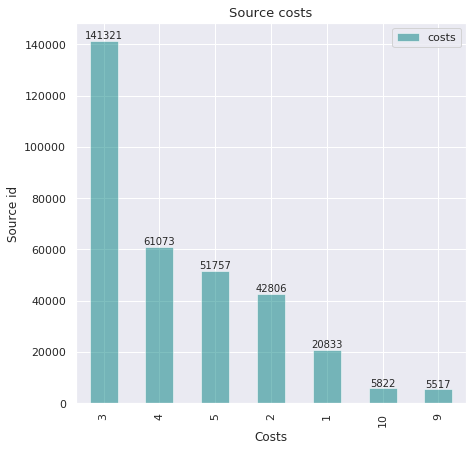

In [113]:
sns.set(rc={'figure.figsize':(7,7)})
costs_by_source.plot(kind = 'bar', color = 'teal', alpha = 0.5, grid = True)

plt.title('Source costs', fontsize=13)
plt.xlabel('Costs', fontsize = 12)
plt.ylabel('Source id', fontsize = 12)

for i, val in enumerate(costs_by_source['costs']):
    plt.text(i, val, int(val), 
             horizontalalignment='center', 
             verticalalignment='bottom', 
             fontdict={'fontweight':500, 'size':10})

Больше всего было потрачено на привлечение клиентов из источника номер 3 - больше 140 т.р., однако доход по ним за весь период изменился незначительно.
Меньше всего было потрачено на источники номер 9 и 10. И доход по ним также минимальный.

In [114]:
# Затраты за каждый месяц
monthly_costs = costs.pivot_table(index = 'cost_month',
                 values = 'costs',
                 aggfunc = 'sum')

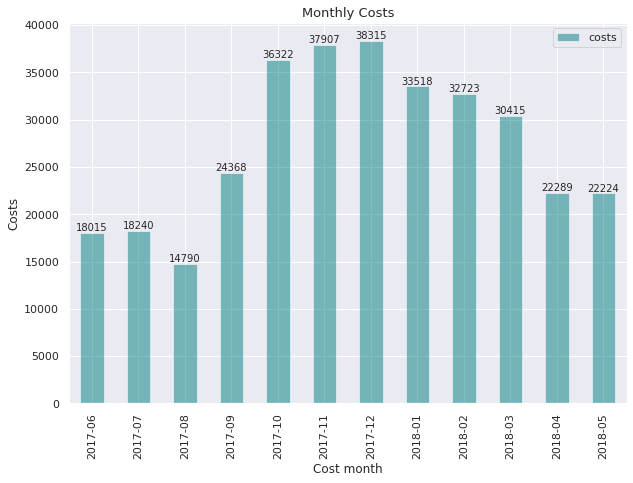

In [115]:
sns.set(rc={'figure.figsize':(10,7)})
ax = monthly_costs.plot(kind = 'bar', color = 'teal', alpha = 0.5, grid = True)
ax.set_xticklabels(costs['date'].astype('datetime64[M]').dt.strftime('%Y-%m').unique())

plt.title('Monthly Costs', fontsize=13)
plt.xlabel('Cost month', fontsize = 12)
plt.ylabel('Costs', fontsize = 12)

for i, val in enumerate(monthly_costs['costs']):
    plt.text(i, val, int(val), 
             horizontalalignment='center', 
             verticalalignment='bottom', 
             fontdict={'fontweight':500, 'size':10})

Если посмотреть на затраты в разрезе каждого месяца, то больше всего денег было потрачено в период с сентября 2017 по декабрь 2017. В этот период наблюдается рост числа посетителей и немного растет средний.

Посмотрим, как менялись затраты по источникам в течение всего периода.

In [116]:
costs_s = (costs.groupby(['cost_month','source_id'])['costs'].sum() / costs.groupby('cost_month')['costs'].sum()).reset_index()

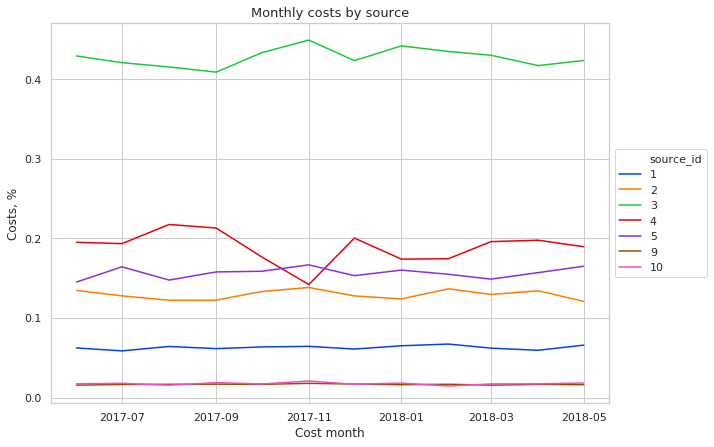

In [117]:
palette = sns.color_palette("bright", 7)

plt.figure(figsize=(10,7))

sns.set_style("whitegrid")
sns.lineplot(data = costs_s, x = 'cost_month', y = 'costs', hue = 'source_id', palette=palette)

plt.title('Monthly costs by source', fontsize=13)
plt.xlabel('Cost month', fontsize = 12)
plt.ylabel('Costs, %', fontsize = 12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Если посмотреть на динамику затрат источников 3 и 4, то мы видим, что в период роста затрат на один истоник, затраты на другой падают. Так, с сентября 2017 вложения в привлечение клиентов из источника 3 начинают расти, а вложения в источник 4, наоборот, снижаются. Это длится до ноября 2017, затем картина меняется на противоположную. 

Примерно на этот же период приходятся и пики посещаемости из этих источников трафика. 

#### 3.10 Сколько стоило привлечение одного покупателя из каждого источника?

Рассчитаем сумму денег, в которую обходится новый клиент.

Сначала без разбивки на источники.

In [118]:
# Суммарные затраты по месяцам
costs_month = costs.groupby('cost_month').agg({'costs': 'sum'}).reset_index()
costs_month.columns = ['cost_month', 'costs_sum']
costs_month

,cost_month,costs_sum
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


In [119]:
# Объединим таблицы и рассчитаем CAC
cac = report.merge(costs_month, left_on = 'order_month', right_on = 'cost_month')
cac['cac'] = cac['costs_sum'] / cac['n_buyers']
cac.head()

,first_order_month,n_buyers,order_month,revenue,gross_profit,age_cohort,ltv,cost_month,costs_sum,cac
0,2017-06-01,2022,2017-06-01,9557.49,9557.49,0,4.726751,2017-06-01,18015.00,8.909496
1,2017-06-01,2022,2017-07-01,981.82,981.82,1,0.485569,2017-07-01,18240.59,9.021063
2,2017-07-01,1922,2017-07-01,11557.65,11557.65,0,6.013345,2017-07-01,18240.59,9.490421
3,2017-06-01,2022,2017-08-01,885.34,885.34,2,0.437854,2017-08-01,14790.54,7.314807
4,2017-07-01,1922,2017-08-01,644.61,644.61,1,0.335385,2017-08-01,14790.54,7.695390


In [120]:
#cac_pivot = cac.pivot_table(index='first_order_month', 
#                 columns='age_cohort', 
#                 values='cac', 
#                 aggfunc='mean').round(2)

#cac_pivot.cumsum(axis=1).fillna('')

__Разбивка на источники.__

In [121]:
# Суммарные затраты по источникам
summa_costs = costs.groupby('source_id')['costs'].sum()
summa_costs

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

In [122]:
# Количество пользователей, совершивших заказ
cohort_size.reset_index()

,first_source,uid
0,1,2896
1,2,3503
2,3,10467
3,4,10296
4,5,6931
5,7,1
6,9,1088
7,10,1327


In [123]:
# Сколько ушло денег на привлечение пользователя из каждого источника
cac_by_source = (summa_costs / cohort_size).round(2).reset_index()
cac_by_source.columns = ['source_id', 'cac']
cac_by_source

,source_id,cac
0,1,7.19
1,2,12.22
2,3,13.50
3,4,5.93
4,5,7.47
5,7,NaN
6,9,5.07
7,10,4.39


Дороже всего обошлись пользователи из 3-го источника. 
В третий исчтоник было вложено больше всего средств и больше всего покупок было совершено именно из этого источника, однако доход по нему изменился минимально.

#### 3.11 На сколько окупились расходы? (ROMI)

In [124]:
cac['romi'] = cac['ltv'] / cac['cac']

In [125]:
romi = cac.pivot_table(index='first_order_month', 
                 columns='age_cohort', 
                 values='romi', 
                 aggfunc='mean').round(2)

romi.cumsum(axis=1).fillna('')

age_cohort,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.58,0.64,0.72,0.78,0.82,0.87,0.91,0.94,0.98,1.03,1.05
2017-07-01,0.63,0.67,0.72,0.74,0.75,0.76,0.77,0.78,0.79,0.8,0.81,
2017-08-01,0.49,0.52,0.54,0.55,0.57,0.58,0.59,0.61,0.63,0.64,,
2017-09-01,0.60,0.68,0.72,0.99,1.02,1.07,1.13,1.16,1.18,,,
2017-10-01,0.60,0.66,0.68,0.7,0.72,0.74,0.76,0.78,,,,
2017-11-01,0.56,0.6,0.62,0.66,0.68,0.69,0.71,,,,,
2017-12-01,0.54,0.57,0.69,0.84,0.9,0.97,,,,,,
2018-01-01,0.42,0.45,0.48,0.5,0.51,,,,,,,
2018-02-01,0.46,0.49,0.5,0.51,,,,,,,,


__По источникам.__

In [126]:
romi_source = cohort_ltv.merge(cac_by_source, left_on = 'first_source', right_on = 'source_id')
romi_source['romi'] = romi_source['ltv'] / romi_source['cac']
romi_source.head()

,first_source,age_cohort,ltv,source_id,cac,romi
0,1,0,6.251164,1,7.19,0.869425
1,1,1,0.922645,1,7.19,0.128323
2,1,2,0.788277,1,7.19,0.109635
3,1,3,0.728736,1,7.19,0.101354
4,1,4,0.405010,1,7.19,0.056330


In [127]:
romi_source.pivot_table(index = 'source_id',
                columns = 'age_cohort',
                values = 'romi').round(2).cumsum(axis=1).fillna(0)

age_cohort,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,0.87,1.00,1.11,1.21,1.27,1.31,1.35,1.40,1.45,1.48,1.50,1.52
2,0.54,0.66,0.79,0.92,0.98,1.02,1.05,1.07,1.08,1.09,1.10,1.10
3,0.33,0.35,0.36,0.37,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38
4,0.77,0.80,0.82,0.84,0.86,0.88,0.91,0.92,0.92,0.93,0.94,0.94
5,0.65,0.68,0.71,0.91,0.94,0.97,0.99,1.00,1.01,1.02,1.02,1.02
9,0.77,0.83,0.88,0.92,0.95,0.98,1.00,1.02,1.05,1.05,1.05,0.00
10,0.72,0.73,0.74,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.00,0.00


In [128]:
romi_source.groupby('source_id')['romi'].sum().round(2).reset_index()

,source_id,romi
0,1,1.49
1,2,1.10
2,3,0.39
3,4,0.93
4,5,1.02
5,7,0.00
6,9,1.04
7,10,0.76


Источники с наибольшими вложениями в них за весь период так и не окупились.

Из всех источников наиболее перспективными могут быть 1,2 и 5, поскольку при меньших вложениях приносят наибольший доход.

# Вывод

1. __Показатели пользовательской активности:__

    Отношение количества уникальных пользователей за день к количеству уникальных пользователей за месяц ~ 4%. Месячное количество уникальных пользователей превышает дневное в несколько раз. Для сервиса по продаже билетов на различные мероприятия это не плохой показатель - вряд ли обычный пользователь покупает билеты на концерты/в кино/театр и тп. каждый день.
    
    В среднем на каждого пользователя приходится по одной сессии в день продолжительностью 60 секунд. Если за это время пользователь успевает приобрести билет или сделать все то, что он хотел, то это может быть нормальным. Однако если посмотреть на среднюю продолжительность сессии, то можно увидеть, что на смартфонах она короче, чем на PC.

    Это может быть связано с тем, что мобильные версии сайта не всегда подходят для просмотра с телефонов или планшетов. С персонального компьютера зачастую  удобнее просмотреть мероприятия и приобрести билеты. Об этом так же могут свидетельствовать низкие показатели пользовательской активности на устройсвах типа touch по сравнению с desktop-ми.


2. __Конверсия, LTV, CAC и ROMI по источникам:__

    Ориентируясь на то, сколько было потрачено на привлечение пользователей из разных источников, на доход из этих источников и их окупаемость, можно сделать следующие выводы: 

    Источники 3 и 4 - общая сумма затрат этих источников больше 200 000 т.р., при этом LTV за весь период изменился лишь на 0.7. Несмотря на то, что большая часть пользователей посетила сайт именно из этих двух источников. И количество покупок по ним так же было больше, чем по другим источникам.

    Источники 1 и 2 - Несмотря на то, что количество посетителей, пришедших из этих источников и оформивших заказ, меньше, чем из первых двух вышеуказанных, показатель LTV по ним за весь период вырос больше, чем в два раза. И показатели конверсии по ним лучше 30% - источник номер 1, и 19% - источник номер 2. При этом вложено средств в источники 1 и 2 почти в 3 раза меньше,чем в источники 3 и 4.


    Исходя из этого, можно сделать вывод, что из всех источников наиболее перспективными могут быть 1,2 и 5, поскольку при меньших вложениях приносят наибольший доход. А также стоит обратить внимание на показатели пользовательской активности на устройствах типа touch. Один из вариантов - улучшить сайт и, возможно, за счет этого снизить затраты на привлечение пользователей и улучшить конверсию. 